In [2]:
import os
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.api.preprocessing.image import load_img, img_to_array
from keras.api.utils import to_categorical
import glob

(256, 256, 3)


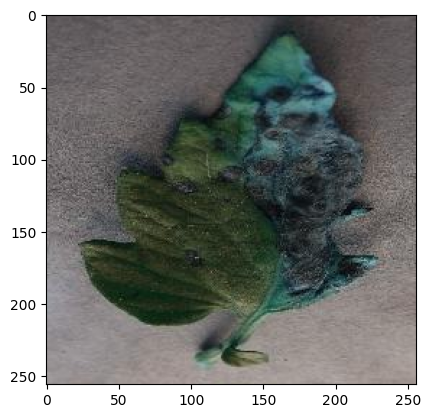

In [3]:
DIR = "/kaggle/input/plantvillage-dataset/color"
CATEGORIES = ['Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight']


for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, image))
        plt.imshow(img_arr)
        print(img_arr.shape)
        break
    break



In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)
        classes = CATEGORIES.index(category)

        for image in os.listdir(path):
            img = load_img(os.path.join(path, image), target_size=(224, 224))
            img_arr = img_to_array(img)
            img_arr = img_arr/255
            print("Shape: ", img_arr.shape)
            training_data.append([img_arr, classes])

print(img_arr.shape)

img_data = np.array(training_data)
img_data = img_data.astype('float32')
print (img_data.shape)


create_training_data()

(256, 256, 3)
(0,)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224,

In [5]:
print(len(training_data))
import random

random.shuffle(training_data)

for sample in  training_data[:10]:
    print(sample[1])


4500
2
2
2
1
2
2
2
1
2
2


In [6]:
features = []
labels = []


for x, y in training_data:
    features.append(x)
    labels.append(y)

features = np.array(features).reshape(-1, 224, 224, 3)

In [7]:
import pickle

# dumping the features and labels
pickle_out = open("features.pkl","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

pickle_out = open("labels.pkl","wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [8]:
pickle_in_features = open('features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)

In [9]:
print(len(x))
print(len(y))

4500
4500


In [10]:
import pickle
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
# Instead of "from keras.layers import merge, Input", use:
from keras import Input  # Input is now directly under keras
from keras.layers import concatenate # merge is replaced with concatenate
from keras.models import Model
from tensorflow.keras.utils import to_categorical # to_categorical is now here

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3150, 224, 224, 3)
(3150,)
(1350, 224, 224, 3)
(1350,)


In [12]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16 # Import VGG16
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

classes = 3

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet') # Now VGG16 is defined


last_layer = model.get_layer('fc2').output
X = last_layer
d1 = Dropout(0.3, name='dropout_layer_1')(X)
out = Dense(3, activation='softmax', name='output')(d1) # Updated for 3 classes
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

print(image_input.shape)

I0000 00:00:1744640506.699224      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744640506.699996      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

(None, 224, 224, 3)


In [13]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t = time.time()

hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=35, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))



Epoch 1/35


I0000 00:00:1744640600.222651     106 service.cc:148] XLA service 0x7ae78c107670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744640600.224445     106 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744640600.224463     106 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744640600.585465     106 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1744640612.527009     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


79/79 - 50s - 633ms/step - accuracy: 0.5921 - loss: 0.8936 - val_accuracy: 0.6810 - val_loss: 0.6735
Epoch 2/35
79/79 - 17s - 217ms/step - accuracy: 0.7282 - loss: 0.6239 - val_accuracy: 0.7825 - val_loss: 0.5028
Epoch 3/35
79/79 - 18s - 227ms/step - accuracy: 0.7849 - loss: 0.5021 - val_accuracy: 0.8032 - val_loss: 0.4470
Epoch 4/35
79/79 - 19s - 238ms/step - accuracy: 0.8222 - loss: 0.4309 - val_accuracy: 0.7889 - val_loss: 0.4651
Epoch 5/35
79/79 - 20s - 252ms/step - accuracy: 0.8333 - loss: 0.3994 - val_accuracy: 0.7698 - val_loss: 0.5176
Epoch 6/35
79/79 - 19s - 245ms/step - accuracy: 0.8377 - loss: 0.3853 - val_accuracy: 0.8000 - val_loss: 0.4380
Epoch 7/35
79/79 - 19s - 238ms/step - accuracy: 0.8512 - loss: 0.3600 - val_accuracy: 0.8159 - val_loss: 0.4264
Epoch 8/35
79/79 - 19s - 238ms/step - accuracy: 0.8484 - loss: 0.3552 - val_accuracy: 0.8429 - val_loss: 0.3635
Epoch 9/35
79/79 - 19s - 241ms/step - accuracy: 0.8365 - loss: 0.3731 - val_accuracy: 0.8540 - val_loss: 0.3683
Epo

In [14]:
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

135/135 - 16s - 117ms/step - accuracy: 0.9141 - loss: 0.2147
[INFO] loss=0.2147, accuracy: 91.4074%


In [15]:
# Evaluate the model on the test data
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test, batch_size=10, verbose=2)

# Print the loss and accuracy
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

# Predict the classes for the test data
y_pred = custom_vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to multiclass format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Generate a classification report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes))

# Optionally, print the predicted classes
# print("Predicted classes:", y_pred_classes)


135/135 - 10s - 71ms/step - accuracy: 0.9141 - loss: 0.2147
[INFO] loss=0.2147, accuracy: 91.4074%
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 314ms/step
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       290
           1       0.96      1.00      0.98       501
           2       0.89      0.92      0.91       559

    accuracy                           0.91      1350
   macro avg       0.91      0.89      0.90      1350
weighted avg       0.91      0.91      0.91      1350



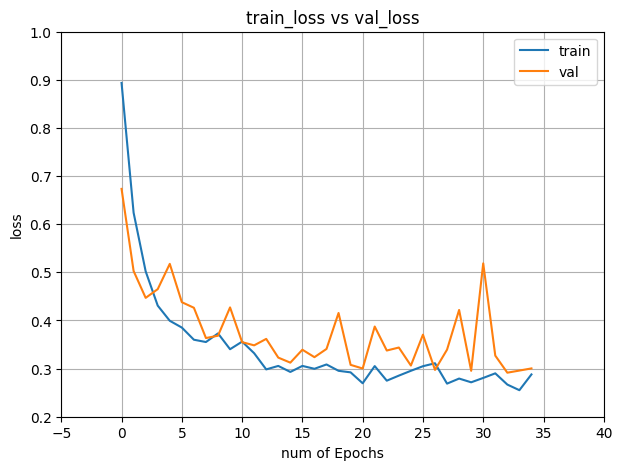

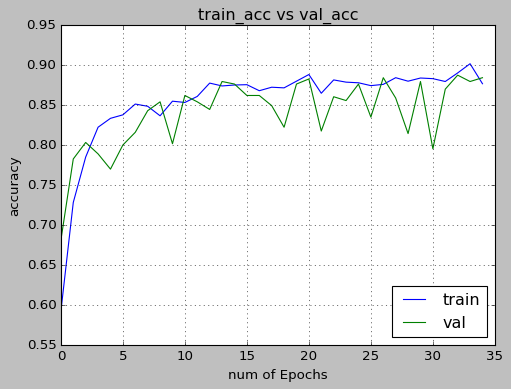

In [16]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(35)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

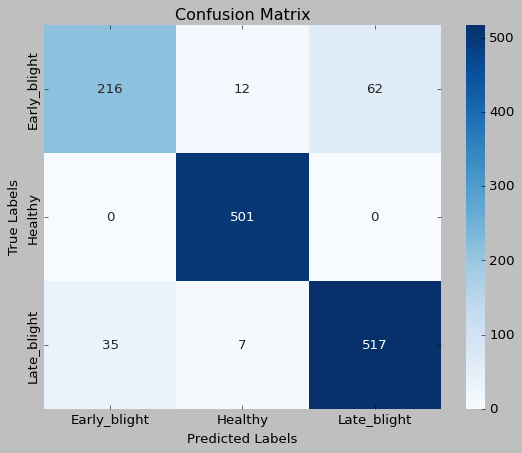

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_classes and y_pred_classes are already defined
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Early_blight', 'Healthy', 'Late_blight'], 
            yticklabels=['Early_blight', 'Healthy', 'Late_blight'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
 